In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

In [2]:
from collections import Counter

In [3]:
df_time = pd.read_csv('./bin/10_30_large_time_result.csv')

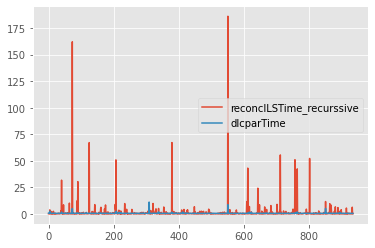

In [4]:
df_time[['reconcILSTime_recurssive','dlcparTime']].plot()
plt.savefig('large_time.png')

In [5]:
df_time[['reconcILSTime_recurssive','dlcparTime']].mean()


reconcILSTime_recurssive    1.666009
dlcparTime                  0.612490
dtype: float64

In [6]:
df_time[['reconcILSTime_recurssive','dlcparTime']].std()

reconcILSTime_recurssive    9.658635
dlcparTime                  0.510195
dtype: float64

In [208]:
df = pd.read_csv('./bin/10_30_result.csv')

In [209]:
True_Duplication = pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['Duplication'])
TRUE_NNI = pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI'])
TRUE_Loss = pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['Loss'])
True_DLCILS= pd.DataFrame(list(df[(df.Process == "True Process")]['DLCILS']),columns=['DLCILS'])
concat_true = pd.concat([True_Duplication,TRUE_Loss],axis=1)

In [210]:
O_Duplication = pd.DataFrame(list(df[(df.Process == "Our_algorithm_recu")]['Duplication']),columns=['Duplication'])
O_NNI = pd.DataFrame(list(df[(df.Process == "Our_algorithm_recu")]['NNI']),columns=['NNI'])
O_Loss = pd.DataFrame(list(df[(df.Process == "Our_algorithm_recu")]['Loss']),columns=['Loss'])
concat_O = pd.concat([O_Duplication,O_Loss],axis=1)

In [211]:
dlc_Duplication = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['Duplication'])
dlc_NNI = pd.DataFrame(list(df[(df.Process == "DLCpar")]['NNI']),columns=['NNI'])
dlc_Loss = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['Loss'])
dlc_DLCILS = pd.DataFrame(list(df[(df.Process == "DLCpar")]['DLCILS']),columns=['DLCILS'])
concat_dlc = pd.concat([dlc_Duplication,dlc_Loss],axis=1)

In [212]:
ete_Duplication = pd.DataFrame(list(df[(df.Process == "ETE3")]['Duplication']),columns=['Duplication'])
#ete_NNI = pd.DataFrame(list(df[(df.Process == "ETE3")]['NNI']),columns=['NNI'])
ete_Loss = pd.DataFrame(list(df[(df.Process == "ETE3")]['Loss']),columns=['Loss'])
#True_ete= pd.DataFrame(list(df[(df.Process == "ETE3")]['DLCILS']),columns=['DLCILS'])
concat_e = pd.concat([ete_Duplication,ete_Loss],axis=1)

#### concat_true_e

In [202]:
True_Duplication['Replicate']=[i for i in range(len(True_Duplication))]
O_Duplication['Replicate']=[i for i in range(len(True_Duplication))]
dlc_Duplication['Replicate']=[i for i in range(len(True_Duplication))]
ete_Duplication['Replicate']=[i for i in range(len(True_Duplication))]


In [203]:
true_reconils_dups= pd.DataFrame(concat_O-concat_true)
val =['reconcILS' for i in range(len(True_Duplication))]
true_reconils_dups['Algorithm']=val
#true_reconils_dups['Replicate']=[i for i in range(99)]

In [204]:
true_dlc_dups= pd.DataFrame((concat_dlc-concat_true))
val =['DLCpar' for i in range(len(True_Duplication))]
true_dlc_dups['Algorithm']=val

#true_ete3_dups['Replicate']=[i for i in range(99)]

In [205]:
true_ete_dups= pd.DataFrame((concat_e-concat_true))
val =['ete3' for i in range(len(True_Duplication))]
true_ete_dups['Algorithm']=val

#true_ete3_dups['Replicate']=[i for i in range(99)]

In [206]:
new =pd.concat([true_reconils_dups,true_dlc_dups,true_ete_dups],axis=0)
new

,Duplication,Loss,Algorithm
0,0,0,reconcILS
1,-1,-2,reconcILS
2,0,0,reconcILS
3,0,0,reconcILS
4,0,2,reconcILS
...,...,...,...
931,1,4,ete3
932,1,3,ete3
933,-1,11,ete3
934,0,-1,ete3


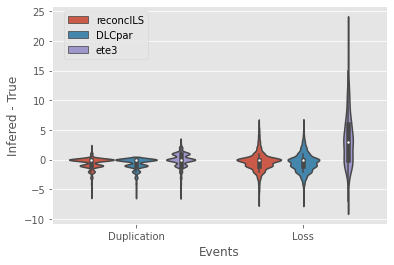

In [17]:
#ax =sns.boxplot(x="variable", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm']))
sns.violinplot(x="variable", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm']))

plt.xlabel("Events")
plt.legend(bbox_to_anchor=(0.3,1))
plt.ylabel("Infered - True")
plt.savefig('box_plot.jpg', dpi=500)
plt.savefig('large_vio.png')


In [39]:
result1,result12

(     0     1
 0    0  0.05
 1    2  1.05
 2    1  1.05
 3    1  1.05
 4    5  5.05
 ..  ..   ...
 931  1  2.05
 932  0  0.05
 933  7  5.05
 934  0  0.05
 935  2  1.05
 
 [936 rows x 2 columns],
      0     1
 0    0 -0.05
 1    2  0.95
 2    1  0.95
 3    1  0.95
 4    5  3.95
 ..  ..   ...
 931  1  0.95
 932  0 -0.05
 933  7  3.95
 934  0 -0.05
 935  2  0.95
 
 [936 rows x 2 columns])

In [108]:
True_value =df[(df.Process == "True Process")][['Replicate','Duplication','NNI','DLCILS','Loss']]
dlcpar_value =df[(df.Process == "DLCpar")][['Process','Replicate','Duplication','NNI','DLCILS','Loss']]
reconcILS_value =df[(df.Process == "Our_algorithm_recu")][['Process','Replicate','Duplication','NNI','DLCILS','Loss']]
True_value_1= True_value.merge(dlcpar_value, how='inner', on='Replicate')
True_value_2 =True_value_1.merge(reconcILS_value, how='left', on='Replicate')

#df_e = pd.concat([True_value, dlcpar_value,reconcILS_value], axis=0)
True_value_3 = pd.melt(True_value_2, id_vars=['Replicate','Process_x','Process_y'])
#print(df)

In [147]:
result1

,0,1
0,0,0.05
1,2,1.05
2,1,1.05
3,1,1.05
4,5,5.05
...,...,...
931,1,2.05
932,0,0.05
933,7,5.05
934,0,0.05


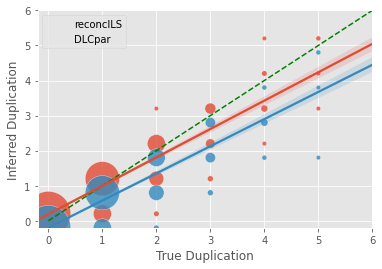

<Figure size 432x288 with 0 Axes>

In [214]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Concatenate and group the data
result1 = pd.concat([True_Duplication['Duplication'], O_Duplication['Duplication']], ignore_index=True, axis=1)
result11 = result1.groupby([0, 1]).size().reset_index(name='Count')

result12 = pd.concat([True_Duplication['Duplication'], dlc_Duplication['Duplication']], ignore_index=True, axis=1)
result22 = result12.groupby([0, 1]).size().reset_index(name='Count')

# Sort the data frames by "Count"
result11 = result11.sort_values(by='Count', ascending=True)
result22 = result22.sort_values(by='Count', ascending=True)

# Add jitter to the x and y values
jitter = 0.2
#result11[0] = result11[0] + np.random.uniform(-jitter, jitter, len(result11))
result11[1] = result11[1] + jitter
result1[1] = result1[1] + jitter

#result22[0] = result22[0] + np.random.uniform(-jitter, jitter, len(result22))
result22[1] = result22[1] - jitter
result12[1] = result12[1] - jitter

# Create the line
x = [0,1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15]
y = [0,1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15]
ax = plt.plot(x, y, '--', color='g')

# Plot the scatter plots
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)

# Show the regression plots
ax = sns.regplot(x=result1[0], y=result1[1], data=result1, marker="", truncate=False,fit_reg=True,   label='reconcILS')
ax = sns.regplot(x=result12[0], y=result12[1], data=result12, marker="", truncate=False,fit_reg=True, label='DLCpar')


plt.xlabel("True Duplication")
plt.ylabel("Inferred Duplication")

# Set the axis limits
ax.set_xlim(-0.2, 6)
ax.set_ylim(-0.2, 6)

plt.legend(bbox_to_anchor=(0.28, 1))

# Save the plot to a file
plt.savefig('regex_dups_small.png', dpi=500)

# Show the plot
plt.show()
plt.clf()


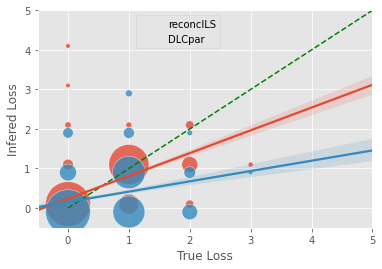

<Figure size 432x288 with 0 Axes>

In [228]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


result1 =pd.concat([TRUE_Loss['Loss'],O_Loss['Loss']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')

result12 =pd.concat([TRUE_Loss['Loss'],dlc_Loss['Loss']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
result22=result12.groupby([0,1]).size().reset_index(name='Count')

x = [0,1, 2, 3, 4, 5,6,7,8,9,10]
y = [0,1, 2, 3, 4, 5,6,7,8,9,10]



# Create the line
line = plt.plot(x, y, '--',color='g')


# Sort the data frames by "Count"
result11 = result11.sort_values(by='Count', ascending=True)
result22 = result22.sort_values(by='Count', ascending=True)

# Add jitter to the x and y values
jitter = 0.1
#result11[0] = result11[0] + np.random.uniform(-jitter, jitter, len(result11))
result11[1] = result11[1] + jitter
result1[1] = result1[1] + jitter

#result22[0] = result22[0] + np.random.uniform(-jitter, jitter, len(result22))
result22[1] = result22[1] - jitter
result12[1] = result12[1] - jitter

sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker="", truncate=False,fit_reg=True, scatter_kws={'alpha':1}, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker="",truncate=False,fit_reg=True,scatter_kws={'alpha':1}, label='DLCpar')



plt.xlabel("True Loss")
plt.ylabel("Infered Loss")
# Show the plot
ax.set_xlim(-0.5, 5)
ax.set_ylim(-0.5, 5)
plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_loss_small.png', dpi=500)

plt.show()
plt.clf()

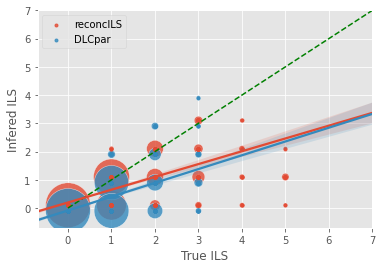

<Figure size 432x288 with 0 Axes>

In [229]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt






result1 =pd.concat([TRUE_NNI['NNI'],O_NNI['NNI']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')
result12 =pd.concat([True_DLCILS['DLCILS'],dlc_DLCILS['DLCILS']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
result22=result12.groupby([0,1]).size().reset_index(name='Count')
x = [0,1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16]
y = [0,1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16]

# Create the line
line = plt.plot(x, y, '--',color='g')
#sns.lmplot(x=result1[0], y=result1[1], data=result1);


# Sort the data frames by "Count"
result11 = result11.sort_values(by='Count', ascending=True)
result22 = result22.sort_values(by='Count', ascending=True)

# Add jitter to the x and y values
jitter = 0.1
#result11[0] = result11[0] + np.random.uniform(-jitter, jitter, len(result11))
result11[1] = result11[1] + jitter
result1[1] = result1[1] + jitter

#result22[0] = result22[0] + np.random.uniform(-jitter, jitter, len(result22))
result22[1] = result22[1] - jitter
result12[1] = result12[1] - jitter


sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".",truncate=False, fit_reg=True, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",truncate=False,fit_reg=True, label='DLCpar')



plt.xlabel("True ILS")
plt.ylabel("Infered ILS")
# Show the plot
ax.set_xlim(-0.7, 7)
ax.set_ylim(-0.7, 7)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_NNI_small.png', dpi=500)

plt.show()
plt.clf()

In [225]:
from scipy.stats import spearmanr
rho_dlcpar_loss, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['Loss']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['Loss']))
rho_reconcils_loss, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['Loss']),pd.DataFrame(list(df[(df.Process == "Our_algorithm_recu")]['Loss']),columns=['Loss']))
rho_dlcpar_dups, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['dups']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['dups']))
rho_reconcILS_dups, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['dups']),pd.DataFrame(list(df[(df.Process == "Our_algorithm_recu")]['Duplication']),columns=['dups']))
rho_dlcpar_NNI, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['DLCILS']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['DLCILS']),columns=['NNI']))
rho_reconcILS_NNI, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm_recu")]['NNI']),columns=['NNI']))

In [226]:
print('Spearman R')
print('DLpar_Duplication:',rho_dlcpar_dups)
print('reconcILS_Duplication:',rho_reconcILS_dups)
print('DLpar_Loss:',rho_dlcpar_loss)
print('reconcILS_Loss:',rho_reconcils_loss)
print('DLpar_ILS:',rho_dlcpar_NNI)
print('reconcILS_NNI:',rho_reconcILS_NNI)



Spearman R
DLpar_Duplication: 0.8922915004587135
reconcILS_Duplication: 0.8937367181077217
DLpar_Loss: 0.3339226894411792
reconcILS_Loss: 0.7293111646862281
DLpar_ILS: 0.5902757755756649
reconcILS_NNI: 0.7187883603729363
